# Homework 3: Data Frames and Graphs  (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.




**Reading**: 

Data8 textbook chapters [5](https://inferentialthinking.com/chapters/05/Sequences.html) and [7.1-7.2](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html).

**Deadline**:

This assignment is due on Tuesday, February 1, at 9:00am. Late work will not be accepted unless you have made special arrangements with the instructors.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.

In [20]:
# import appropriate libraries here
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'datatable'

## 311 Call log 
We will be working with a dataset from the Chicago Open Data Portal  data.chicago.gov.  This is a log of calls (and web requests) to the city's non-emergency hotilne.
The dataset is described at https://data.cityofchicago.org/Service-Requests/311-Service-Requests/v6vf-nfxy  and was downloaded January 6, 2022.  It has been filtered to include only the 152k complaints that cam in Janaury 2020.

In [2]:
jan_df = pd.read_csv("311_Service_Requests_Jan2020.csv")
jan_df.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,OWNER_DEPARTMENT,STATUS,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,...,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,0,SR20-03333992,Traffic Signal Out Complaint,SFB,CDOT - Department of Transportation,Completed,01/16/2020 06:10:02 AM,01/16/2020 10:32:04 AM,01/16/2020 09:31:54 AM,NaN,...,NaN,NaN,6,5,1,NaN,NaN,NaN,NaN,NaN
1,84,SR20-03334532,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 08:42:33 AM,01/16/2020 01:31:38 PM,01/16/2020 08:42:39 AM,NaN,...,NaN,NaN,8,5,1,NaN,NaN,NaN,NaN,NaN
2,90,SR20-03335498,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:24:35 AM,01/16/2020 02:31:29 PM,01/16/2020 10:24:48 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
3,96,SR20-03335462,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:23:40 AM,01/16/2020 02:31:09 PM,01/16/2020 10:23:47 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN
4,109,SR20-03335458,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,01/16/2020 10:23:40 AM,01/16/2020 02:31:09 PM,01/16/2020 10:23:47 AM,NaN,...,NaN,NaN,10,5,1,NaN,NaN,NaN,NaN,NaN


In [3]:
# We can explore this dataset by looking at the distributions of the values in the columns:
jan_df.OWNER_DEPARTMENT.value_counts()

311 City Services                                  59036
Aviation                                           31957
Streets and Sanitation                             25620
CDOT - Department of Transportation                25527
Animal Care and Control                             3320
DWM - Department of Water Management                2975
DOB - Buildings                                     2516
BACP - Business Affairs and Consumer Protection      781
Health                                               327
City Clerk's Office                                   94
Department of Planning and Development                44
Fire                                                  20
Name: OWNER_DEPARTMENT, dtype: int64

In [4]:
jan_df.SR_TYPE.value_counts()

311 INFORMATION ONLY CALL                    59036
Aircraft Noise Complaint                     31957
Graffiti Removal Request                      9570
Street Light Out Complaint                    7521
Pothole in Street Complaint                   4572
                                             ...  
Inaccurate Fuel Pump Complaint                   6
Pushcart Food Vendor Complaint                   6
Pavement Cave-In Inspection Request              4
Bungalow/Vintage Home Information Request        4
Clean and Green Program Request                  2
Name: SR_TYPE, Length: 89, dtype: int64

<BarContainer object of 20 artists>

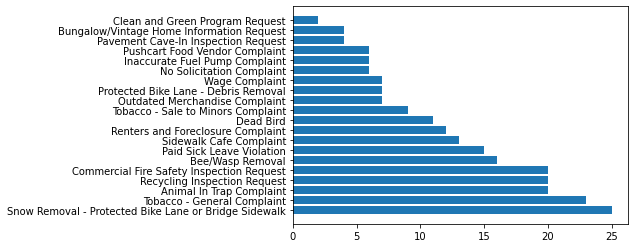

In [5]:
# This plots bars with the length of the number of complaints in the top 20 categories.
plt.barh(jan_df.SR_TYPE.value_counts().index[-20:], jan_df.SR_TYPE.value_counts().values[-20:])

**Question 1:** find the distribution of STREET_ADDRESS field for 311 calls in Janaury 2020.  How many different addresses are there?  What fraction of calls are in the two most common addresses?
    

In [23]:
#Distribution of street addresses
address_count = pd.value_counts(jan_df.STREET_ADDRESS)
address_count

print("There are 45,516 different addresses. The fraction of the two most common street addresses is 0.59...")

2111 W Lexington ST         58970
10510 W ZEMKE RD            31944
1601 W BELMONT AVE             79
7100 S COTTAGE GROVE AVE       63
10000 W OHARE AIRPORT          45
                            ...  
2312 N NAGLE AVE                1
3219 N OCTAVIA AVE              1
3513 N CENTRAL AVE              1
2311 N MAJOR AVE                1
1200 S SACRAMENTO DR            1
Name: STREET_ADDRESS, Length: 45516, dtype: int64

**Question 2:**  Find the distribution of SR_TYPE for the calls with the two most common addresses in the STREET_ADDRESS field for 311 calls in Janaury 2020.  
    
    

In [43]:
address.get'3910 W WILCOX ST'

SyntaxError: invalid syntax (<ipython-input-43-3ef78bf8a1b5>, line 1)

In [30]:
address = jan_df.STREET_ADDRESS
call_type = jan_df.SR_TYPE
address_w_type = pd.DataFrame({"Street Address": address, "Call Type": call_type})
address_w_type

,Street Address,Call Type
0,NaN,Traffic Signal Out Complaint
1,NaN,Graffiti Removal Request
2,NaN,Graffiti Removal Request
3,NaN,Graffiti Removal Request
4,NaN,Graffiti Removal Request
...,...,...
152212,3910 W WILCOX ST,Garbage Cart Maintenance
152213,1111 S CAMPBELL AVE,Garbage Cart Maintenance
152214,6545 S DAMEN AVE,Garbage Cart Maintenance
152215,4356 W 21ST PL,Garbage Cart Maintenance


**Question 3:**  In `jan_df.head()`  we see the first few rows are missing address information. STREET_ADDRESS has a special (numerical) value called "Not-a-number" or "NaN" for these first few rows.  Find all the rows that have no address, and find the conditional distribution of the complaint type (SR_TYPE).   **Hint**  `pd.isnull()`  will tell you if a column like STREET_ADDRESS has invalid data.


In [39]:
addresses = jan_df.STREET_ADDRESS
null_addresses = pd.isnull(addresses)
pd.value_counts(null_addresses)

False    152075
True        142
Name: STREET_ADDRESS, dtype: int64

In [40]:
null_addresses = addresses.head(142)
null_addresses_2 = pd.isnull(null_addresses)
pd.value_counts(null_addresses_2)

True     139
False      3
Name: STREET_ADDRESS, dtype: int64

**Question 4:**  Plot the distribution of total complaints against calendar day.  Can you tell if the complaints come in at a higher or lower rate on weekends?

In [ ]:
# plt.hist(jan_df.CREATED_DATE)  # THIS WILL NOT WORK while CREATED_DATE is a string with
# 141354 different values, that is, when most of the values in CREATED_DATE are unique.  

# You can choose among several approaches.  You can convert CREATED_DATE to a date format
# can use the coloumn CREATED_DAY_OF_WEEK?
# and work with it there, or you can perform string manipulations on it to turn it into 
# the categorical variable that you want.
# calandar day refers to mm/dd/yyyy

jan_df.CREATED_DATE[0]

## Lake level fluctuations


In [19]:
lakelevel_df=pd.read_csv("LAKELEVEL_30years.csv")
lakelevel_df["level"] = lakelevel_df["MSL (ft)"]* 0.3048

FileNotFoundError: [Errno 2] No such file or directory: 'LAKELEVEL_30years.csv'

**Question 5:** Make an adequately-labeled plot of the monthly lake level from 1992 to 2021.  Do what needs to be done to make the graph presentable: no overlapping text, appropriate labels.

**Question 6:** Calculate the average lake level in each calendar month over the time series (the average of the 30 January 1 measurements, the average of the February 1 measurements..)

**Question 7:** Plot the above 12 numbers to find the high- and low- water season in Lake Michigan-Huron.

**Question 8:** Make an adequately-labeled histogram of the monthly lake levels with at least 20 bins.

**Question 9:** Make an adequately-labeled histogram of the monthly 6-month differences in lake levels with at least 20 bins.

In [ ]:
## COVID case rates


**Question 10:** Plot the time series of daily COVID cases for Cook county for the past two years.  You can use `IDPHExport20220118050537274.csv` from Homework 2.

**Question 11:** Plot both the time series of daily COVID cases for Cook county and the two-week-average daily case rates on the same graph.   This is commonly done for journalistic presentation of the time series.

**Question 12:** Plot the histogram of the number of daily COVID cases in Cook County over the same time interval.  Not for credit: What do you notice about the distribution?  What does the mode mean?  How is it unlike lake levels?
**Note** this histogram of a rate violates the area principle.  Different dots on the graph have dramatically different importance in contributing to the whole.  The "histogram of daily infection numbers" is a strange thing to look at, but it does show one thing, that the most common infection rates have been low ones.